# Customer Transaction Data

* Data Period: 01 January, 2023 - 14 October, 2023
* Data Source: [Kaggle - Customer Transaction](https://www.kaggle.com/datasets/bkcoban/customer-transactions/data)
* Author: Huu Phuc (Felix) Hong
* Last Update: 23 October, 2023

In [256]:
# Import library
import pandas as pd
import missingno as ms
import plotly.express as px

In [257]:
# Import dataset
df = pd.read_csv("sample_dataset.csv")

## Data Preparation

### Data Missing

Overall, 10% of Gender is missed and will be marked as "Unidentified"

<Axes: >

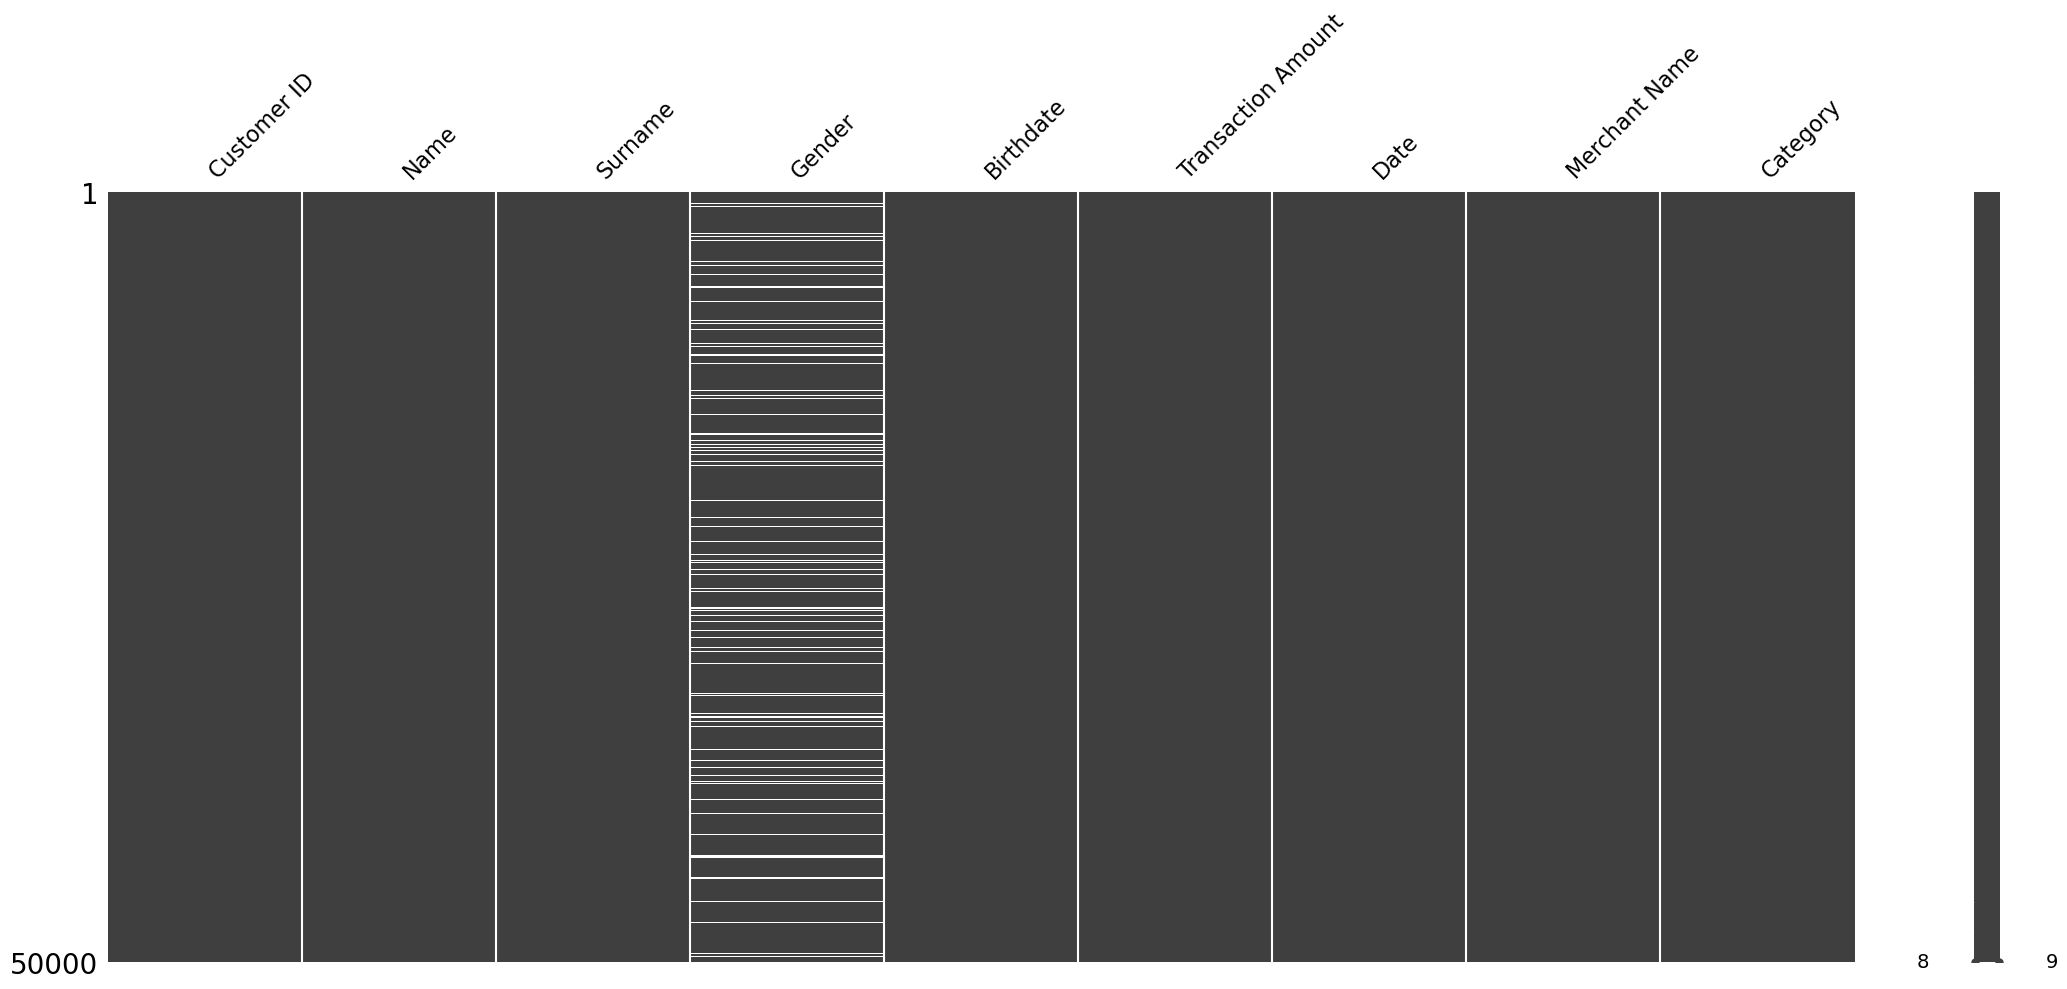

In [258]:
ms.matrix(df)

In [259]:
# Data overall information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Surname             50000 non-null  object 
 3   Gender              44953 non-null  object 
 4   Birthdate           50000 non-null  object 
 5   Transaction Amount  50000 non-null  float64
 6   Date                50000 non-null  object 
 7   Merchant Name       50000 non-null  object 
 8   Category            50000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


In [260]:
# Fill missing data
df["Gender"].fillna("Unidentified", inplace=True)

# Replace 'F' with 'Female' and 'M' with 'Male' in the 'Gender' column
df['Gender'] = df['Gender'].replace({'F': 'Female', 'M': 'Male'})

In [261]:
# Rename column
df.columns = df.columns.str.replace(' ', '') 

### Data Type

Usually, CustomerID should be string type because these are nominal data representing unique ID of each customer. Other columns that need to be reassigned are date related columns, Birthdate and Date in this case.

In [262]:
# Reassign to correct type
df["CustomerID"] = df["CustomerID"].astype(str)
df["Birthdate"] = pd.to_datetime(df["Birthdate"])
df["Date"] = pd.to_datetime(df["Date"])

### EDA

Firstly, I will create a new column named Age and Age Group by calculating the difference between Transaction Date and Birthdate for further analysis

In [263]:
# Create Age column
df["Age"] = df["Date"].dt.strftime('%Y').astype(int) - df["Birthdate"].dt.strftime('%Y').astype(int)

In [264]:
# Define a function to classify age group
def categorize_age(age):
    if age >= 18 and age <= 35:
        return "18-35"
    elif age > 35 and age <= 60:
        return "35-60"
    else:
        return "60+"

# Create age group column
df['AgeGroup'] = df['Age'].apply(categorize_age)

In [265]:
# Drop Birthdate column
df.drop(["Birthdate"], axis = 1, inplace = True)

I will also create transaction month column for time series analysis

In [266]:
df["TransactionMonth"] = df["Date"].dt.strftime('%B')

In [267]:
# Data sample
df.head()

,CustomerID,Name,Surname,Gender,TransactionAmount,Date,MerchantName,Category,Age,AgeGroup,TransactionMonth
0,752858,Sean,Rodriguez,Female,35.47,2023-04-03,Smith-Russell,Cosmetic,21,18-35,April
1,26381,Michelle,Phelps,Unidentified,2552.72,2023-07-17,"Peck, Spence and Young",Travel,38,35-60,July
2,305449,Jacob,Williams,Male,115.97,2023-09-20,Steele Inc,Clothing,42,35-60,September
3,988259,Nathan,Snyder,Male,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,46,35-60,January
4,764762,Crystal,Knapp,Female,62.21,2023-06-13,Palmer-Hinton,Electronics,72,60+,June


In [268]:
# Describe numerical column
df.describe()

,TransactionAmount,Age
count,50000.000000,50000.000000
mean,442.119239,46.497840
std,631.669724,16.831256
min,5.010000,18.000000
25%,79.007500,32.000000
50%,182.195000,47.000000
75%,470.515000,61.000000
max,2999.880000,75.000000


#### Summary

##### Overall

In [269]:
# Calculate the statistics
num_customers = df['CustomerID'].nunique()
num_merchants = df['MerchantName'].nunique()
num_categories = df['Category'].nunique()
total_transaction_amount = df['TransactionAmount'].sum()
average_transaction_amount = df['TransactionAmount'].mean()

# Create a summary table with commas as separators
summary_table = pd.DataFrame({
    'Summary': ['Number of Customers', 'Number of Merchants', 'Number of Categories', 'Total Transaction Amount', 'Average Transaction Amount Per Person'],
    'Value': [f'{num_customers:,.0f}', f'{num_merchants:,.0f}', f'{num_categories:,.0f}', f'{total_transaction_amount:,.0f}', f'{average_transaction_amount:,.0f}']
})

# Display the summary table
summary_table

,Summary,Value
0,Number of Customers,"50,000"
1,Number of Merchants,"36,939"
2,Number of Categories,6
3,Total Transaction Amount,"22,105,962"
4,Average Transaction Amount Per Person,442


##### Summary Table By Gender

In [270]:
# Group the data by 'Gender' and calculate summary statistics
gender_groups = df.groupby('Gender')

summary_table = gender_groups.agg(
    Number_of_Customers=('CustomerID', 'nunique'),
    Number_of_Merchants=('MerchantName', 'nunique'),
    Number_of_Categories=('Category', 'nunique'),
    Total_Transaction_Amount=('TransactionAmount', 'sum'),
    Average_Transaction_Amount_Per_Customer=('TransactionAmount', 'mean')
)

# Format the summary table to include commas as separators
summary_table['Number_of_Customers'] = summary_table['Number_of_Customers'].apply('{:,.0f}'.format)
summary_table['Number_of_Merchants'] = summary_table['Number_of_Merchants'].apply('{:,.0f}'.format)
summary_table['Number_of_Categories'] = summary_table['Number_of_Categories'].apply('{:,.0f}'.format)
summary_table['Total_Transaction_Amount'] = summary_table['Total_Transaction_Amount'].apply('{:,.0f}'.format)
summary_table['Average_Transaction_Amount_Per_Customer'] = summary_table['Average_Transaction_Amount_Per_Customer'].apply('{:,.0f}'.format)

# Rename the columns
summary_table = summary_table.rename(columns=lambda x: x.replace('_', ' '))

# Display the summary table
summary_table

,Number of Customers,Number of Merchants,Number of Categories,Total Transaction Amount,Average Transaction Amount Per Customer
Gender,,,,,
Female,"22,713","18,264",6,"10,119,120",446
Male,"22,240","17,903",6,"9,794,883",440
Unidentified,"5,047","4,544",6,"2,191,959",434


##### Summary Table By Age Group

In [271]:
# Group the data by 'Gender' and calculate summary statistics
age_groups = df.groupby('AgeGroup')

summary_table = age_groups.agg(
    Number_of_Customers=('CustomerID', 'nunique'),
    Number_of_Merchants=('MerchantName', 'nunique'),
    Number_of_Categories=('Category', 'nunique'),
    Total_Transaction_Amount=('TransactionAmount', 'sum'),
    Average_Transaction_Amount_Per_Customer=('TransactionAmount', 'mean')
)

# Format the summary table to include commas as separators
summary_table['Number_of_Customers'] = summary_table['Number_of_Customers'].apply('{:,.0f}'.format)
summary_table['Number_of_Merchants'] = summary_table['Number_of_Merchants'].apply('{:,.0f}'.format)
summary_table['Number_of_Categories'] = summary_table['Number_of_Categories'].apply('{:,.0f}'.format)
summary_table['Total_Transaction_Amount'] = summary_table['Total_Transaction_Amount'].apply('{:,.0f}'.format)
summary_table['Average_Transaction_Amount_Per_Customer'] = summary_table['Average_Transaction_Amount_Per_Customer'].apply('{:,.0f}'.format)

# Rename the columns
summary_table = summary_table.rename(columns=lambda x: x.replace('_', ' '))

# Display the summary table
summary_table

,Number of Customers,Number of Merchants,Number of Categories,Total Transaction Amount,Average Transaction Amount Per Customer
AgeGroup,,,,,
18-35,"15,616","13,009",6,"6,860,208",439
35-60,"21,310","17,225",6,"9,458,314",444
60+,"13,074","11,017",6,"5,787,441",443


#### Transaction Amount by Gender

From the first look, during the period, female has higher transaction amount than male

In [272]:
# Group the data by 'Gender' and calculate the sum of transaction amounts
gender_groups = df.groupby('Gender')['TransactionAmount'].sum().divide(10**6).round(2)

# Calculate the mean of the TransactionAmount
mean_transaction_amount = gender_groups.mean()

# Create a bar chart using Plotly Express
fig = px.bar(gender_groups, x=gender_groups.index, y='TransactionAmount', title='Transaction Amount by Gender')
fig.update_xaxes(title_text='Gender')
fig.update_yaxes(title_text='Total Transaction Amount (million $)')

# Increase the length of the horizontal line for the mean value
fig.add_shape(
    type='line',
    x0=-1,
    x1=len(gender_groups),
    y0=mean_transaction_amount,
    y1=mean_transaction_amount,
    line=dict(color='red', dash='dash'),
    name='Mean Transaction Amount'
)

# Show the interactive chart
fig.show()

However, when comparing the average transaction amount, there are almost no different between male and female

In [273]:
# Group the data by 'Gender' and calculate the mean of transaction amounts
mean_gender_groups = df.groupby('Gender')['TransactionAmount'].mean().round(2)

# Create a bar chart using Plotly Express
fig = px.bar(mean_gender_groups, x=mean_gender_groups.index, y='TransactionAmount', title='Average Transaction Amount by Gender')
fig.update_xaxes(title_text='Gender')
fig.update_yaxes(title_text='Average Transaction Amount')

# Show the interactive chart
fig.show()

#### Transaction Amount by Age Group

People from 35-60 age group have the highest transaction amount, the second one are people from 18-35 bracket and the last one are from 60+ group

In [274]:
# Group the data by 'AgeGroup' and calculate the sum of transaction amounts
age_groups = df.groupby('AgeGroup')['TransactionAmount'].sum().divide(10**6).round(2)

# Calculate the mean of the TransactionAmount
mean_transaction_amount = age_groups.mean()

# Create a bar chart using Plotly Express
fig = px.bar(age_groups, x=age_groups.index, y='TransactionAmount', title='Transaction Amount by Age Group')
fig.update_xaxes(title_text='Age Group')
fig.update_yaxes(title_text='Total Transaction Amount (million $)')

# Add a horizontal line for the mean value
fig.add_shape(
    type='line',
    x0=-1,
    x1=len(age_groups),
    y0=mean_transaction_amount,
    y1=mean_transaction_amount,
    line=dict(color='red', dash='dash'),
    name='Mean Transaction Amount'
)

# Show the interactive chart
fig.show()

However, similar to the pattern of transaction amount by gender, people from different age groups have almost the same average transaction amount

In [275]:
# Group the data by 'AgeGroup' and calculate the mean of transaction amounts
mean_age_groups = df.groupby('AgeGroup')['TransactionAmount'].mean().round(2)

# Create a bar chart using Plotly Express
fig = px.bar(mean_age_groups, x=mean_age_groups.index, y='TransactionAmount', title='Average Transaction Amount by Age Group')
fig.update_xaxes(title_text='AgeGroup')
fig.update_yaxes(title_text='Average Transaction Amount')

# Show the interactive chart
fig.show()

#### Top 5 Merchants with highest Transaction Amount

According to the data, top 5 merchants with highest transaction amount are those with name prefix are Johnson and Smith. For further confirmation if those with same prefix are the same company, business knowledge is needed

In [276]:
# Group the data by 'MerchantName' and calculate the sum of transaction amounts
merchant_groups = df.groupby('MerchantName')['TransactionAmount'].sum().divide(10**3).round(2).nlargest(5)

# Calculate the mean of the TransactionAmount
mean_transaction_amount = merchant_groups.mean()

# Create a bar chart using Plotly Express
fig = px.bar(merchant_groups, x=merchant_groups.index, y='TransactionAmount', title='Transaction Amount by Merchant')
fig.update_xaxes(title_text='Merchant Name')
fig.update_yaxes(title_text='Total Transaction Amount (thousand $)')

# Add a horizontal line for the mean value
fig.add_shape(
    type='line',
    x0=-1,
    x1=len(merchant_groups),
    y0=mean_transaction_amount,
    y1=mean_transaction_amount,
    line=dict(color='red', dash='dash'),
    name='Mean Transaction Amount'
)

# Show the interactive chart
fig.show()

#### Transaction Amount by Spending Category

During the study period, spending for travel is the highest and the most dominated among 6 different categories

In [277]:
# Group the data by 'Category' and calculate the sum of transaction amounts
category_groups = df.groupby('Category')['TransactionAmount'].sum().divide(10**6).round(2).sort_values(ascending=False)

# Calculate the mean of the TransactionAmount
mean_transaction_amount = category_groups.mean()

# Create a bar chart using Plotly Express
fig = px.bar(category_groups, x=category_groups.index, y='TransactionAmount', title='Transaction Amount by Category')
fig.update_xaxes(title_text='Category')
fig.update_yaxes(title_text='Total Transaction Amount (million $)')

# Add a horizontal line for the mean value
fig.add_shape(
    type='line',
    x0=-1,
    x1=len(category_groups),
    y0=mean_transaction_amount,
    y1=mean_transaction_amount,
    line=dict(color='red', dash='dash'),
    name='Mean Transaction Amount'
)

# Show the interactive chart
fig.show()

#### Transaction Amount by Gender and Category

Overall, both male and female spend mostly for travelling

In [278]:
# Group the data by 'Gender' and 'Category' and calculate the sum of transaction amounts
transaction_by_gender_and_category = df.groupby(['Gender', 'Category'])['TransactionAmount'].sum().divide(10**6).round(2).unstack()

# Create an interactive stacked bar chart using Plotly
fig = px.bar(transaction_by_gender_and_category, barmode='stack')

# Customize the chart labels and title
fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Transaction Amount (million $)',
    title='Transaction Amount by Gender and Category'
)

# Show the interactive chart
fig.show()

#### Transaction Amount by Age Group and Category

The same pattern goes for different age groups as well

In [279]:
# Group the data by 'AgeGroup' and 'Category' and calculate the sum of transaction amounts
transaction_by_age_group_and_category = df.groupby(['AgeGroup', 'Category'])['TransactionAmount'].sum().divide(10**6).round(2).unstack()

# Create an interactive stacked bar chart using Plotly
fig = px.bar(transaction_by_age_group_and_category, barmode='stack')

# Customize the chart labels and title
fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Transaction Amount (million $)',
    title='Transaction Amount by Age Group and Category'
)

# Show the interactive chart
fig.show()

#### Monthly Transaction Amount

Overall, there is a fluctuation of transaction amount between month. However, there is a 2 months steadily decrease from July to September. For October, because the study period is just to 14 October so the amount cannot be compared

In [280]:
# Define the correct order of months
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October"]

# Convert the 'TransactionMonth' column to a categorical data type with the specified order
df['TransactionMonth'] = pd.Categorical(df['TransactionMonth'], categories=month_order, ordered=True)

# Group the data by 'TransactionMonth' and calculate the sum of transaction amounts
monthly_totals = df.groupby('TransactionMonth')['TransactionAmount'].sum().divide(10**6).round(2).reset_index()

# Create an interactive line chart using Plotly with the correct month order
fig = px.line(monthly_totals, x='TransactionMonth', y='TransactionAmount', title='Monthly Transaction Amount')

# Customize the chart labels and title
fig.update_layout(
    xaxis_title='Transaction Month',
    yaxis_title='Transaction Amount (million $)',
    title='Monthly Transaction Amount (2023)'
)

# Show the interactive chart
fig.show()

##### By Gender

Overall, the pattern between male and female regarding monthly transaction amount is the same. Male spending in May increased significantly compared to that of female

In [281]:
# Group the data by 'TransactionMonth' and 'Gender' and calculate the sum of transaction amounts
monthly_totals = df.groupby(['TransactionMonth', 'Gender'])['TransactionAmount'].sum().divide(10**6).round(2).reset_index()

# Create an interactive line chart using Plotly
fig = px.line(monthly_totals, x='TransactionMonth', y='TransactionAmount', color='Gender', title='Monthly Transaction Amount by Gender')

# Customize the chart labels and title
fig.update_layout(
    xaxis_title='Transaction Month',
    yaxis_title='Transaction Amount (million $)',
    title='Monthly Transaction Amount by Gender (2023)'
)

# Show the interactive chart
fig.show()